<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Shengtao Lin<br>
<b>NetID</b>:sl1377<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: SL    


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Final Project: Deep Learning with TensorFlow

** This final project is due December 10, 2019 at 11:59pm (graded on accuracy and completeness) **

In this project we will work through the process of:
1. installing TensorFlow in your local environment
2. Learn some basics of how to use TensorFlow API
3. Implement a classical linear regression model with TensorFlow
4. Implement a k-means for clustering images
5. Import and Train a model with FashionNIST dataset 
6. Predict new images based on the trained model

This project should give you some basic knowledge on how to work with deep learning systems. Although we do not implement any neural networks from scratch in this lab, it is also important for you to have an understanding of how neural networks work.Please refer to classnotes to see how neural networks are trained. In this project we will use existing libraries, but by selecting and tuning parameters.

# Part 0 - Install TensorFlow
This is our first experience with deep learning methods. We need to set things up first. Execute the lines below to get the setup going. Set up only needs to be done once.

In [1]:
# Task 0.1. tf requires a numpy update
!pip install numpy --upgrade

     |████████████████████████████████| 15.1MB 5.3MB/s eta 0:00:01
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [1]:
import sys

sys.executable

!/Users/LINHTS/anaconda3/bin/python -m pip install tensorflow==1.14.0

In [9]:
# Task 0.2. install tensorflow

!pip install --user tensorflow==1.14.0 # you can also specify what version of TF you need.

In [4]:
# Task 0.3. install keras API
!pip install --user keras --upgrade

     |████████████████████████████████| 378kB 767kB/s eta 0:00:01


# Initialize 

In [2]:
# # Task 0.4. all the import we need
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras     # we can also access keras API with tf.keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
# now we are ready to move on to doing some amazing things.

/Users/LINHTS/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/LINHTS/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/LINHTS/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/LINHTS/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

1.14.0


# Part 1 - Getting to know TensorFlow (TF)
TensorFlow is a framework. This core open source library help you develop and train ML models. You can install tensorflow locally or run tensorflow on colab.research.google.com directly in your browser. TensorFlow supports wide range of devices and API's, including javascript for deploying mobile ML based applications. It can run on single CPU systems, GPUs, TPU's as well as mobile devices and large scale distributed systems of hundreds of machines.
TensorFlow is its own framework. Everything in TF is implemented as a computational graph. The graph nodes are executed at later times. 
Let us understand some of its basic API functionality.

## Task 1.1 Learn the basics
TensorFlow is a framework to allow efficient computing with multi-dimensional data. All the calls to TF are executed through API calls. It uses python (altough there are other TF suported languages now such as R)  in the backend to exceute these commands. All objects are stored as tensors, a form of a vector. A TF graph can be evaluated using a tensorflow session. Here are few examples. Just run the cells and see what happens. 

In [185]:
# create two constant tensors
two_node = tf.constant(8)     
three_node = tf.constant(9)
# sum of the two tensors
sum_node = two_node + three_node    # need a session to evaluate the value of sum_node
# product the two objects
pdt_node = two_node * three_node
print(sum_node)                   # should notice that they are just unevaluated tensors
# A session is an object instance that encapsulate the state and operations on the object.
with tf.Session() as sess:
    # call run method in the session object to evaluate the two_node and sum_node objects
    print(sess.run([sum_node, pdt_node]))
    
# QUESTION : Explain why print(sum_node) does not show the value 17
## BEGIN SOLUTION
 
'''Because  now it is create a computational graph which is the 'add' function. 
It will get a symbolic variable, not the final output. 
In order to actually do any computations, we need a session and use the run method. 
'''

## END SOLUTION

Tensor("add_10:0", shape=(), dtype=int32)
[17, 72]


"Because  now it is create a computational graph which is the 'add' function. \nIt will get a symbolic variable, not the final output. \nIn order to actually do any computations, we need a session and use the run method. \n"

## Loops in TensorFlow
 read more about loops in : https://www.tensorflow.org/api_docs/python/tf/while_loop

In [186]:
# here is some sample code on how to write loops. Just modify the code
i = tf.constant(0)
cond = lambda i: tf.less(i, 12)
body = lambda i: tf.add(i, 1)
r = tf.while_loop(cond, body, [i])   # returns the final value of i
with tf.Session() as sess:
    print(sess.run(r))



12


### Another Example of a While Loop

In [187]:
# some other demo code on how to use tf.while
def cond(t1, t2):
    return tf.less(t1, t2)

def body(t1, t2):
    return [tf.add(t1, 1), t2]

t1 = tf.constant(2)
t2 = tf.constant(4)

res = tf.while_loop(cond, body, [t1, t2])

with tf.Session() as sess:
    print(sess.run(res))

# question: What happens if we change both t1 and t2 at the same time?
## BEGIN SOLUTION
#  the varibale t1 and t2 in the cond and body function will change at the same time.
## END SOLUTION

[4, 4]


## Task 1.2 Find the first 10 Fibbonachchi numbers
In this activity we will write TF code using tensorflow framework to output the first 10 Fibonnachi numbers 1 1 2 3 5 8 13 21 34 55 as a list

In [188]:
fib1 = tf.Variable(1)
fib2 = tf.Variable(1)
## BEGIN SOLUTION


sum_new = tf.add(fib1,fib2)   

with tf.control_dependencies([sum_new]):
    x = tf.assign(fib1,fib2)
    
with tf.control_dependencies([x]):
    y = tf.assign(fib2,sum_new)
    

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    fibonacci =[fib1.eval(), fib2.eval()]
    
    for i in range(8):
        next, x1, y1 = sess.run([sum_new, x, y])
        fibonacci.append(next)

print(fibonacci)



## END SOLUTION

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


## Task 1.3 Activating Placeholders
In the execution of the tensorflow objects, it is possible that you will have to wait for some results to show after a cycle of operations. A placeholder is more like a variable that you would declare in a program and initialize later. In general, Insert a placeholder for a tensor that will be always fed.We can use tf.placeholder to make calls to placeholder tensors. Read more about placeholders at https://www.tensorflow.org/api_docs/python/tf/placeholder

In [189]:
## BEGIN SOLUTION

# two tensor placeholders that can hold int32 data
x = tf.placeholder(tf.int32)       # x can hold int32 
y = tf.placeholder(tf.int32)        # y can hold int32 

# Find sum, difference and product
sumOf = tf.add(x,y)                 # use tf.sum
diff =  tf.subtract(x,y)            # use tf.subtract
prod =  tf.multiply(x,y)            # use tf.multiply

# store inputs as a dictionary
dict_values = {x:20,y:30}          # store values x = 20 and y = 30 as a dictionay


## END SOLUTION

# run a session
with tf.Session() as sess:
    print('Sum',sess.run(sumOf,feed_dict=dict_values))
    print('Difference',sess.run(diff,feed_dict=dict_values))
    print('Product',sess.run(prod,feed_dict=dict_values))

Sum 50
Difference -10
Product 600


## Task 1.4 Matrix Operations
The power of the concept of a tensor is its ability to treat all data as vectors. This makes it easy to parallelize many operations such as matrix multiplication. If you run code on colab.research.google.com, you can also choose some server configuration (GPU, TPU) to run your code faster.

In [190]:
## BEGIN SOLUTION

import numpy as np
# initialize numpy arrays a and b
a = np.array([[5.0,5.0]])               
b = np.array([[2.0],[2.0]])  

# define two tensors mat1 and mat2 using numpy arrays a and b
mat1 = tf.placeholder(tf.float32, shape = [1,2])                  # mat1 is a rank-1 tensor               
mat2 = tf.placeholder(tf.float32, shape = [2,1])                 # mat2 is a rank-2 tensor  

# build a matrix multiplier tensor
matrix_pdt = tf.matmul(mat1, mat2)    # use tf.matmul to find the result
# run a session and perform the operartions
dict_values = {mat1:a,mat2:b} 

with tf.Session() as sess:
    result = sess.run(matrix_pdt, dict_values)
    print(result)
## END SOLUTION

#with tf.Session() as sess:
#    result = sess.run(matrix_multi)
#    print(result)

[[20.]]


### Read API Docs
The above examples were just few things to demonstrate that tensorflow is a complete framework and one can code an entire program using tensor objects. Read more at https://www.tensorflow.org/api_docs

# Part 2 Linear Regression with TensorFlow
We have learned how to implement linear regression using Pandas. In this exercise, we will learn how to use tensorflow to implement linear regression. As stated TensorFlow is a framework that allows you to implement many standard ML algorithms. We will implement Linear Regression using TF libraries.

## Task 2.1 set up
Let us set up basic things needed to get tensorflow going. You are asked to experiment with different values of alpha (learning rate), epochs (how many rounds in training. Too little is under-fitting, too much is over-fitting). You need to display the process every 50 steps.

In [191]:
# initialize
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# BEGIN SOLUTION
# set parameters
alpha = 0.001    # alpha is the learning rate
epochs = 10   # One epoch is when an entire dataset is passed both forward and backward through the neural network 
                # only once
step = 50       # every 50 iterations display the results.


# END SOLUTION

## Task 2.2 Read data
We will work with our CS 205 Data set. First we create a data frame, then extract midterm and final exam scores as numpy arrays.

In [192]:
# Read the Training Data

# BEGIN SOLUTION
import pandas as pd
df = pd.read_csv("data/midterm_finals_CS205F18.csv")

# use first 110 records for the training data
train_X = df[0:110].values[:,0]
train_Y = df[0:110].values[:,1]

# use the remaining for validation
validate_X = df[110:].values[:,0]
validate_Y = df[110:].values[:,1]

n_samples = train_X.shape[0]
print("training set size: ", n_samples) 
print("validation set size: ", validate_X.shape[0])    


# END SOLUTION

training set size:  110
validation set size:  28


## Task 2.3 Intialize model
Set model weights and bias. You may want to try random weights and random bias. If they do not provide a good regression line, try to pre-set some values for weight and bias. The values must be floats.

In [193]:
# tf Graph Input. We will feed the values later using feed_dict.
X = tf.placeholder("float")
Y = tf.placeholder("float")

# BEGIN SOLUTION
# Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor 
# whose value can be changed by running ops on it. tf.Variable exists outside the context of a single session.run call.

theta = tf.Variable(1.0, tf.float32)   # define tf.Variable theta and initialize to some value
b = tf.Variable(1.0, tf.float32)         # define tf.Variable bias b and initialize

# END SOLUTION

## Task 2.4 Linear Model

In [194]:
# Construct a linear model using tf.add and tf.multiply. The model provides y = theta*x + bias
# BEGIN SOLUTION
predictor = tf.add(tf.multiply(X, theta), b)


# END SOLUTION

In [195]:
# Compute the average squared error using TF calls
# BEGIN SOLUTION
# Mean squared error
cost = tf.reduce_mean(tf.square(predictor - Y))
# Use the Gradient descent Optimizer from tf.train
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(alpha)

# END SOLUTION

In [196]:
# Initialize the variables (i.e. assign their default value)
## BEGIN SOLUTION
init = tf.global_variables_initializer()

## END SOLUTION

## Task 2.5 Train the Model
Train the linear regression model by running the training data through the network.

In [197]:
## BEGIN SOLUTION
train = optimizer.minimize(cost)
sess = tf.Session()
sess.run(init)
dic_value={X:train_X, Y:train_Y}
previous_loss = np.inf
current_loss = 0
current_W=0
current_b=0
count=0


while 1:
    sess.run(train, dic_value)
    current_W, current_b, current_loss = sess.run([theta, b, cost], {X:train_X, Y:train_Y})   
    count=count+1
    
    if(count%step == 0):
        print("Epoch: %s cost = %s W = %s  b = %s" % (count, current_loss, current_W, current_b))
    if(np.abs(previous_loss - current_loss) < 0.00000001):
        print("Optinization Finished!")
        print("Traing cost = %s theta = %s  b = %s" % (current_loss, current_W, current_b))
        break
    #print(previous_loss)
    #print(curr_loss)
    previous_loss = curr_loss
    
## END SOLUTION

Epoch: 50 cost = 16.08393 W = 0.84079546  b = 1.008944
Epoch: 100 cost = 16.0764 W = 0.8394854  b = 1.0283037
Epoch: 150 cost = 16.069075 W = 0.8381932  b = 1.0473993
Epoch: 200 cost = 16.061947 W = 0.83691865  b = 1.0662342
Epoch: 250 cost = 16.055012 W = 0.8356615  b = 1.0848122
Epoch: 300 cost = 16.048267 W = 0.83442146  b = 1.1031368
Epoch: 350 cost = 16.041706 W = 0.8331983  b = 1.121211
Epoch: 400 cost = 16.035322 W = 0.831992  b = 1.1390389
Epoch: 450 cost = 16.02911 W = 0.83080196  b = 1.1566234
Epoch: 500 cost = 16.023066 W = 0.8296282  b = 1.1739683
Epoch: 550 cost = 16.017185 W = 0.8284705  b = 1.1910764
Epoch: 600 cost = 16.011465 W = 0.82732856  b = 1.2079511
Epoch: 650 cost = 16.0059 W = 0.8262023  b = 1.2245955
Epoch: 700 cost = 16.000486 W = 0.8250913  b = 1.2410128
Epoch: 750 cost = 15.995217 W = 0.82399553  b = 1.2572061
Epoch: 800 cost = 15.990091 W = 0.8229146  b = 1.2731786
Epoch: 850 cost = 15.9851055 W = 0.8218485  b = 1.2889332
Epoch: 900 cost = 15.980254 W = 0.

## Task 2.6 Display Regression Line

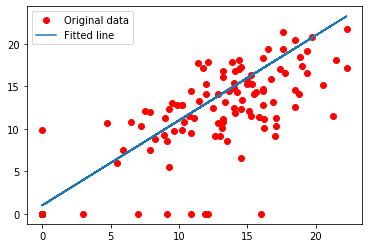

In [198]:
#Graphic display
with tf.Session() as sess:
    sess.run(init)
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(theta) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Task 2.7 Compare with Validation Data
We have some validation samples and let us see where the line fits

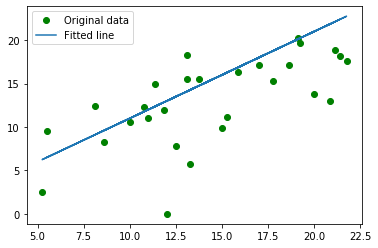

In [199]:
## BEGIIN SOLUTION
with tf.Session() as sess:
    sess.run(init)
    plt.plot(validate_X, validate_Y, 'go', label='Original data')
    plt.plot(validate_X, sess.run(theta) * validate_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


## END SOLUTION

# Part 3 - MNIST Dataset

## Task 3.1 download the MNIST dataset

In [200]:
import tensorflow as tf
# get the MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Task 3.2 Learn about the data set.
Just write some code to answer the following questions. 

- how big is the training set?
- how big is the test set?

In [201]:
### BEGIN SOLUTION
from tensorflow.examples.tutorials.mnist import input_data

# get training images from MNIST
train_images = mnist.train.images
# how big is test images?
test_images = len(mnist.test.images)
# how big is validation set?
validation_images = len(mnist.validation.images)

### END SOLUTION
print("\ntest images:", test_images, "validation images:", validation_images)


test images: 10000 validation images: 5000


## Visualize the data set
Each image is a 28 x 28 gray-scale 2D image. Display the images images[0] and images[1] as 2D images.
Then flatten and display image[0] to understand the form of the data.

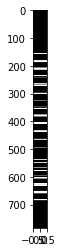

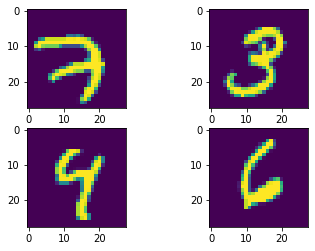

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline
plt1 = plt.imshow(mnist.train.images[0].reshape(28,28))
plt2 = plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')  # gray scale
# flatten images[1] and display
plt3 = plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

# show first 4 images side by side. 
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mnist.train.images[0].reshape(28,28))
axarr[0,1].imshow(mnist.train.images[1].reshape(28,28))
axarr[1,0].imshow(mnist.train.images[2].reshape(28,28))
axarr[1,1].imshow(mnist.train.images[3].reshape(28,28))


# Handwriting classification with k-means
In this part, we will use the MNIST dataset to import 60,000 handwritten digits and implement k-means to classify them. MNIST is a benchmark dataset that can help learn many things about Deep Learning basics.
This Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. You can import this data from keras.datasets or from tensorflow.examples.tutorials.mnist. You can use either form in your solutions.

## Task 3.3 Visualize the image
Each image is a gray-scale 28x28 (784 pixles) image. You can treat the image as a rank-1 tensor (or 1D vector) of size 784 with each value between 0-255. We can plot some images here.

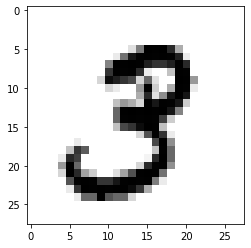

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline
### BEGIN SOLUTION
plt1 = plt.imshow(mnist.train.images[1].reshape(28,28),cmap=plt.cm.binary)   # visualize image[1]
### END SOLUTION

## Task 3.4 Implementing k-means algorithm
In this part we will implement k-means algorithm to identify possible clusters in this data. An image in this data set is a gray-scale 28 x 28 image (784 pixels with values from 0-255). We will use the eucledean distance between two images to see the "distance" between them. Since we are working in high dimension (784) we can only understand the concept of distance here. We will use the k-means algorithm that was discussed in lecture 12.2 slide 15. You do not need to use TF modules t do this.

### Task 3.4.1 Implement the k-means algorithm (vectorized)

In [204]:
# The vectorized version of k-means is given on the slide 14 of Lecture 12.1.
# Just use the same code.

## BEGIN SOLUTION
def kmeans(X, k, max_iter = 100, rand_seed = 0):
    Mu= X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D=-2*X@Mu.T+(X**2).sum(axis=1)[:,None]+(Mu**2).sum(axis=1)
        C=np.eye(k)[np.argmin(D,axis=1),:]
        Mu = (C.T@X)/np.sum(C,axis=0)[:,None]
    loss=np.linalg.norm(X-Mu[np.argmin(D,axis=1),:])**2
    return Mu, C, loss


## END SOLUTION

### Task 3.4.2 Cluster MNIST images.
Experiment to Find a good value of k such that most centers look like images.

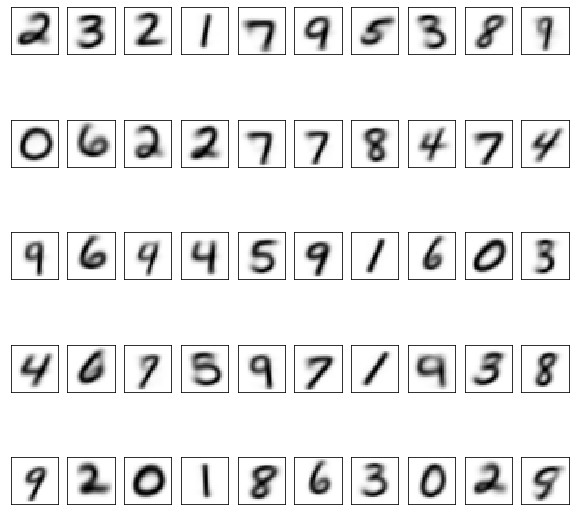

In [205]:
## BEGIN SOLUTION

# start with k = 50
k = 50
# flatten each image to be 784 value vector and form 55000 x 784 matrix X
X = mnist.train.images.flatten().reshape(55000,784)

# Choose k random centers from X. That is k random data points become the original cluster centers
Mu = X[np.random.choice(X.shape[0],k),:]
# call the kmeans algorithm defined above. Be sure to have the proper arguments passed to kmeans.
[Mu, y, loss] = kmeans(X, k, max_iter=10, rand_seed=0)


# Plot the cluster centers as images
#plt1= plt.imshow(Mu[0].reshape(28,28))

            
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Mu[i].reshape(28,28),cmap=plt.cm.binary)
plt.show()


## END SOLUTION


# First Exercise in Deep Learning
Deep Learning has become quite popular in recent times (since 2012) due to its remarkable advances in applications including self driving cars, image recognition, and voice to text conversion. The hello world of deep learning (DL) is long considered to be the exercise that uses of the MNIST hand-written digits dataset that was created by Yann Lecun in 1998. Yann LeCunn who is a professor at NYU and Director of AI at Facebook, just won the 2019 Turing Award for his contributions to Deep Learning. Let us go through a series of exercises to learn how to read, train and validate an image data set. In this case the 60,000 handwritten images of 0-9.

## Task 3.5 Create a Model

In [206]:
import tensorflow as tf
## BEGIN SOLUTION

# create a placeholder
x = tf.placeholder(tf.float32,shape=[None,784])  # 784 = mnist.train.images[1].shape

# there are 10 possible numbers that the classifier must recognize
# start with a matrix 784x10 of all zeros
thetas = tf.Variable(tf.zeros([784,10]))

# create a tf.Variable of 10 zeros (we need to find 10 categories 0-9)
b = tf.Variable(tf.zeros([10]))

# Create the Graph thetas*x + b
y = tf.add(tf.matmul(x, thetas), b)

# loss and optimizer
y_true = tf.placeholder(tf.float32,[None,10])

# Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a 
# probability value between 0 and 1.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

# optimizer is a Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)

# training model using optimizer.minimize. Pass cross_entrophy as the argument
train = optimizer.minimize(cross_entropy)



## END SOLUTION

## Task 3.6 Create a Session and Train

In [207]:
# initialize all global variables
init = tf.global_variables_initializer()

Suggestions: 
- Train the model for 1000 steps on the training set
- Use the built in batch feeder from minist for conveninece
- Test the Train Model and print out the accuracy of the Model

In [208]:
## BEGIN SOLUTION
with tf.Session() as sess:
    sess.run(init)

    for step in range(1000):
        batch_x , batch_y = mnist.train.next_batch(100)            
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))


## END SOLUTION

0.9131


## Task 3.7 (challenge task - optional)
What is the maximum accuracy you observed in the previous part?  The best models can get closer to 99% accuracy. If you'd like,  you can try to improve the accuracy of the classifier. Please try this after completing all the required activities.

In [209]:
## Code and documentation for challenge task (optional). You can add any additional cells as needed.

# Part 4 - Classification of Fashion images

## Task 4.1 Set up

In [210]:
# import the fashionMNISt data set and separate training and test sets
# use keras.datasets.fashion_mnist
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

## Task 4.2 Explore this data set
Inspect the dataset. The class names are not included with the data. We will add them.
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [211]:
# add classnames label images (ints) corresponds to thses labels. For example label 0 is T-shirt/top
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## BEGIN SOLUTION
# how many images and their dimensions
print('shape of train images:',train_images.shape)
# what is the length of the training set?
print('length of train images:',len(train_images))
# how do the training labels look like?
print('shape of train labels:',train_labels.shape)
print('length of train labels:',len(train_labels))
# find more about test_images shape and labels
print('shape of test images:',test_images.shape)
print('length of test images:',len(test_images))
print('shape of test labels:',test_labels.shape)
print('length of test labels:',len(test_labels))


## END SOLUTION

shape of train images: (60000, 28, 28)
length of train images: 60000
shape of train labels: (60000,)
length of train labels: 60000
shape of test images: (10000, 28, 28)
length of test images: 10000
shape of test labels: (10000,)
length of test labels: 10000


## Task 4.3 Visualize images in the data set

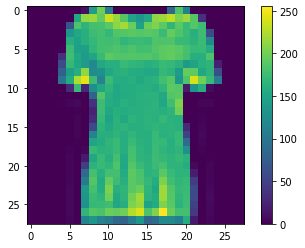

T-shirt/top


In [212]:
# visualize an image[10] in this data set
## BEGIN SOLUTION

plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[10]])

## END SOLUTION

## Task 4.4 Plotting images

In [213]:
# scale the images
train_images = train_images / 255.0
test_images = test_images / 255.0

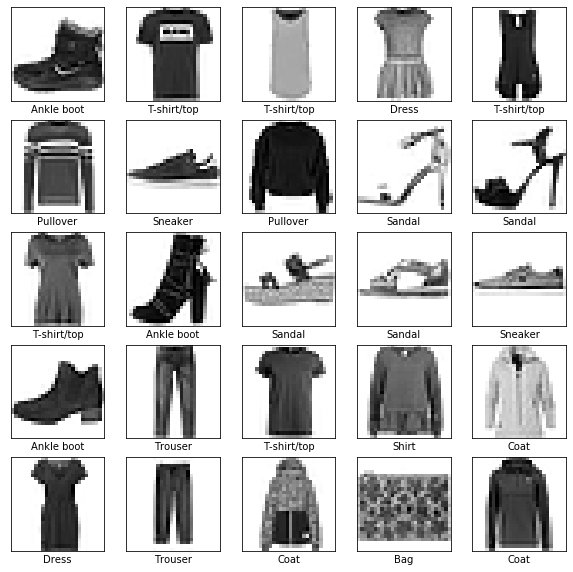

In [214]:
# plot the first 25 images and their class_names in a 5x5 grid 
## BEGIN SOLUTION
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
## END SOLUTION

## Task 4.5 Model Creation and Compilation
Read about keras model creation at https://keras.io/models/about-keras-models/
also read about sequential models at https://keras.io/models/sequential/

In [215]:
# create a keras.sequential model
# use tf.nn.relu as activation. Read more at https://www.tensorflow.org/api_docs/python/tf/nn
# use one input layer (784), one hidden layer(128), and one output layer(10) in the model.
# we are only going to use one hidden layer in the model
# see some examples here: https://keras.io/models/model/

## BEGIN SOLUTION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, softmax


train_images = train_images.flatten().reshape(60000, 28*28)
test_images = test_images.flatten().reshape(10000, 28*28)

model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## END SOLUTION

In [216]:
# compile the model. See https://keras.io/models/model/.
# you can use the adam optimizer. 
# The choice of optimization algorithm for your deep learning model is really important
# The Adam optimization algorithm is an extension to stochastic gradient descent 
# that is better for deep learning applications in computer vision.
## BEGIN SOLUTION
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
## END SOLUTION

## Task 4.6 Fit the model
Fit the model to training images. https://keras.rstudio.com/reference/fit.html
You can use any number of epochs (eg. 10). You should see the accuracy increasing and loss decreasing for training images.

In [217]:
## BEGIN SOLUTION
model.fit(train_images, train_labels, epochs = 10)

## END SOLUTION

Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4982 - acc: 0.8243
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3738 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3338 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3116 - acc: 0.8859
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2933 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2800 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2665 - acc: 0.9018
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2571 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2469 - acc: 0.9082
Epoch 10/10
60000/60000 [==============================] - 2s 38us/sample - loss: 

## Task 4.7 Test Accuracy
Using model.evaluate (see https://keras.io/models/model/) find the test_loss and test_accuracy

In [218]:
## BEGIN SOLUTION
test_loss, test_acc = model.evaluate(test_images, test_labels)

## END SOLUTION
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3427 - acc: 0.8766
Test accuracy: 0.8766
Test loss: 0.34269672639369964


## Task 4.8 Predicting
using model.predict, create a prediction model for test_images

In [219]:
## BEGIN SOLUTION
# create a prediction model for the test images
predictions = model.predict([test_images])

## END SOLUTION

test image # 4 predicted as: Shirt


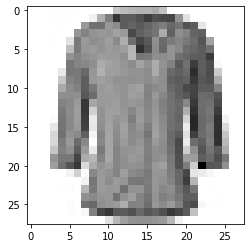

In [220]:
## Check to see the accuracy of model prediction
# how well the model predicted an image? 
## BEGIN SOLUTION
image_num  = 4
predicted =np.argmax(predictions[image_num])
name = class_names[predicted]

print("test image #", image_num, "predicted as:", name)
plt.figure()
plt.imshow(test_images[image_num].reshape(28,28), cmap= plt.cm.binary)
plt.show()
## END SOLUTION

## Task 4.9 Plotting the Predictor confidence
Use the following function plot_image to plot the predictor confidence.

In [221]:
# code by François Chollet
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

image# 0


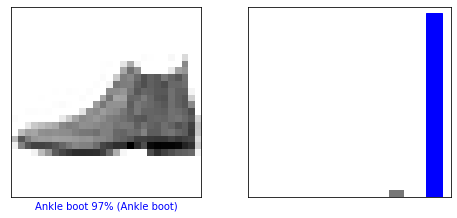

image#


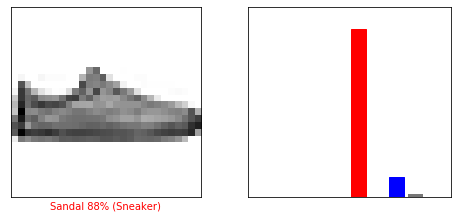

In [222]:
# use the plot_image to display images and how well they were predicted.
## BEGIN SOLUTION
i = 0
print("image#", i)
plt.figure(figsize=(8,3.5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()
i = 12
print("image#", )
plt.figure(figsize=(8,3.5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

## END SOLUTION

## Task 4.10
Plot a 20 images (shown as 5x4 grid) to see test images and their confidence

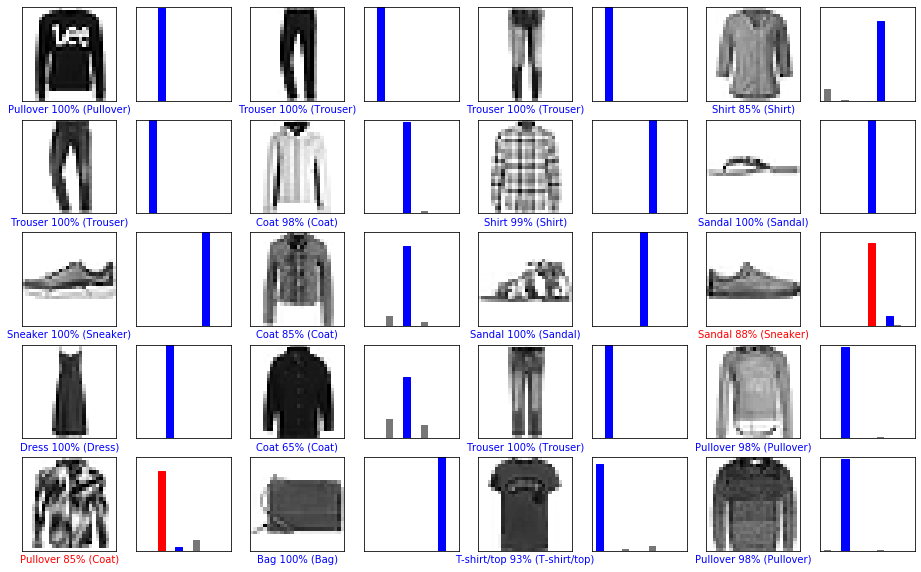

In [223]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
## BEGIN SOLUTION

plt.figure(figsize=(2*2*4, 2*5))

for i in range(1,21):
  plt.subplot(5, 2*4, (i%4)*2-1 + int(i/4) * 8)
  plot_image(i, predictions, test_labels, test_images.reshape(10000,28,28))
  plt.subplot(5, 2*4, (i%4)*2 + int(i/4) * 8)
  plot_value_array(i, predictions, test_labels)
plt.show()
## END SOLUTION

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-10, 10-highest) :
* how can we improve his lab? :

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_finalProj.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; finalProj <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Lab designed by A.D. Gunawardena, 2019. Acknowledgements: Google TensorFlow group